<a href="https://colab.research.google.com/github/mohitpsingh/Langchain/blob/feature%2Fchatbot_tutorial/Langchain7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RAG Application
### It Read the PDF and makes a 3D Visualization
### Store the Chunks into the Qdrant Database
### Fetch the Information on our own Private Data set

In [1]:
!pip install -qU langchain-qdrant
!pip install protobuf==4.21.5
!pip install -qU langchain-qdrant --no-deps
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.4/306.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.4/408.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [4]:
!pip install --upgrade --quiet  fastembed
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.0 MB/s eta 0:00:00


In [5]:
!pip install langchain PyMuPDF pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.6 MB/s eta 0:00:00


In [3]:
import os

os.environ["GROQ_API_KEY"] = "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"

### PDF Doucment which is used to fetch the Data

In [6]:
pdf_file_path = "https://gordianknot.stanford.edu/sites/g/files/sbiybj22971/files/media/file/Artificial%20Intelligence-Machine%20Learning%20Explained.pdf"

### Load the PDF pages into one variable

In [7]:
from langchain.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(pdf_file_path)
pages = loader.load()
pages_content = [page.page_content for page in pages]
content = " ".join(pages_content)

### Distributing the content into chunks

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document

text_splitter = RecursiveCharacterTextSplitter(chunk_size=170, chunk_overlap=0)
chunks = text_splitter.split_documents([Document(page_content=content)])
chunks

[Document(metadata={}, page_content='Artificial Intelligence/ \nMachine Learning Explained \nGordian Knot Center for \nNational Security Innovation \nAuthor: Steve Blank \nhttps://gordianknot.stanford.edu'),
 Document(metadata={}, page_content='Artificial Intelligence/Machine Learning– Explained \n \nAI is a once-in-a lifetime commercial and defense game changer'),
 Document(metadata={}, page_content='Hundreds of billions in public and private capital is being invested in AI and Machine Learning'),
 Document(metadata={}, page_content='companies. The number of patents filed in 2021 is more than 30 times higher than in 2015 as'),
 Document(metadata={}, page_content='companies and countries across the world have realized that AI and Machine Learning will be a \nmajor disruptor and potentially change the balance of military power.'),
 Document(metadata={}, page_content='Until recently, the hype exceeded reality. Today, however, advances in AI in several important'),
 Document(metadata={}, 

### Passing the Chunks into the Embedding tool which transform human language into numarical representation that machines can understand.

In [9]:
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings

fast_embedding = FastEmbedEmbeddings()
texts = [chunk.page_content for chunk in chunks]
embeddings = fast_embedding.embed_documents(texts)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

model_optimized.onnx:   0%|          | 0.00/66.5M [00:00<?, ?B/s]

### Creating the 3D Visualization of the chunks

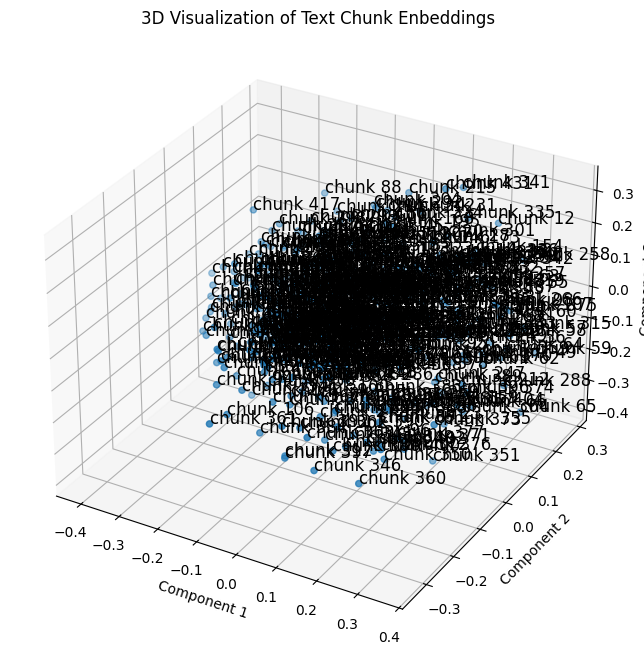

In [11]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
embeddings_array = np.array(embeddings)
reduced_embeddings = pca.fit_transform(embeddings_array)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2])

for i, chunk in enumerate(chunks):
  ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], f'chunk {i + 1}', fontsize=12)

plt.title('3D Visualization of Text Chunk Enbeddings')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.grid(True)
plt.show()

### Storing all the chunks into a variable to pass it as a Document for the Database

In [25]:
from langchain_qdrant import QdrantVectorStore

documents = [Document(page_content=text) for text in texts]

vector_store = QdrantVectorStore.from_documents(
    documents,
    fast_embedding,
    url="https://8bab9558-9b12-4eed-b7be-91776edc2ddc.europe-west3-0.gcp.cloud.qdrant.io:6333",
    api_key="JEHDJC5Enug4dRAY7fUeTczO4aLDlJ_y7QaeL_bcsq2GejZ6VhvmWw",
    collection_name="visual"
)

### Use Similarity search to retrieve the Information based on the given Prompt

In [26]:
query = "What do you mean by automate ?"
result = vector_store.similarity_search(query)

print("Retrieved Chunks based on Query:")
print("--------------------------------")
for i, result in enumerate(result):
  print(f"Result {i + 1}:")
  print(result.page_content)
  print("--------------------------------")

Retrieved Chunks based on Query:
--------------------------------
Result 1:
Human-Machine Teaming in Tasking and Dissemination 
AI-enabled systems will automate and optimize tasking and collection for platforms, sensors,
--------------------------------
Result 2:
Human-Machine Teaming in Tasking and Dissemination 
AI-enabled systems will automate and optimize tasking and collection for platforms, sensors,
--------------------------------
Result 3:
processes aimed at maintaining data sets and deriving meaning out of them. In the context of 
AI, it’s the practice of people who are doing machine learning.
--------------------------------
Result 4:
processes aimed at maintaining data sets and deriving meaning out of them. In the context of 
AI, it’s the practice of people who are doing machine learning.
--------------------------------
